In [1]:
# importing required basic libraries
import warnings
warnings.simplefilter("ignore")
import joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [4]:
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [5]:
# checking if the dataset consists of any mising values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

we can observe that the dataset does not contain any null values

In [6]:
#checking for na values in the dataset
df.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

we can observe that the dataset does not contain any na values 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Dataset consists of mixed dtypes object and int datatypes. To convert object dtype we might use the encoding techniques in our further implements.

In [8]:
#removing Id column from the dataset
df.drop(['ID'],axis=1,inplace=True)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [10]:
# Get unique values for all columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in age: [56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90]
Unique values in job: ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
Unique values in marital: ['married' 'divorced' 'single']
Unique values in education: ['unknown' 'secondary' 'tertiary' 'primary']
Unique values in default: ['no' 'yes']
Unique values in balance: [1933    3  891 ... 2787 8741 2968]
Unique values in housing: ['no' 'yes']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['telephone' 'cellular' 'unknown']
Unique values in day: [19 20 18 22  4  2  3  8 15  5 28  6 14  7 24 13  9 11 21 12 30 27 17 16
 25 10  1 29 26 31 23]
Unique values in month: ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'm

now that we checked the unique values lets do some analysis 

In [11]:
#univariant Analysis 
for column in df.columns:
    print(f"Univariate Analysis for {column}:\n{'='*40}")
    
    # Descriptive statistics
    print("Descriptive Statistics:")
    print(df[column].describe())

Univariate Analysis for age:
Descriptive Statistics:
count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
Univariate Analysis for job:
Descriptive Statistics:
count           31647
unique             12
top       blue-collar
freq             6842
Name: job, dtype: object
Univariate Analysis for marital:
Descriptive Statistics:
count       31647
unique          3
top       married
freq        19095
Name: marital, dtype: object
Univariate Analysis for education:
Descriptive Statistics:
count         31647
unique            4
top       secondary
freq          16224
Name: education, dtype: object
Univariate Analysis for default:
Descriptive Statistics:
count     31647
unique        2
top          no
freq      31062
Name: default, dtype: object
Univariate Analysis for balance:
Descriptive Statistics:
count     31647.000000
mean       1363.89025

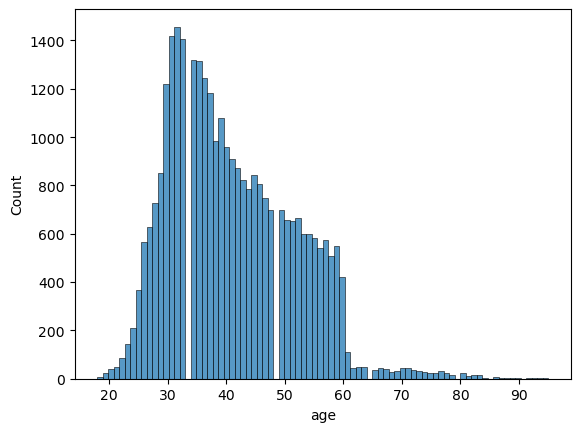

In [12]:
sns.histplot(df['age'])
plt.show()

In [13]:
print(df['job'].value_counts(normalize=True)*100)

blue-collar      21.619743
management       20.978292
technician       16.769362
admin.           11.473441
services          9.173065
retired           4.973615
self-employed     3.548520
entrepreneur      3.185136
unemployed        2.859671
housemaid         2.761715
student           2.006509
unknown           0.650931
Name: job, dtype: float64


married     60.337473
single      28.192246
divorced    11.470282
Name: marital, dtype: float64


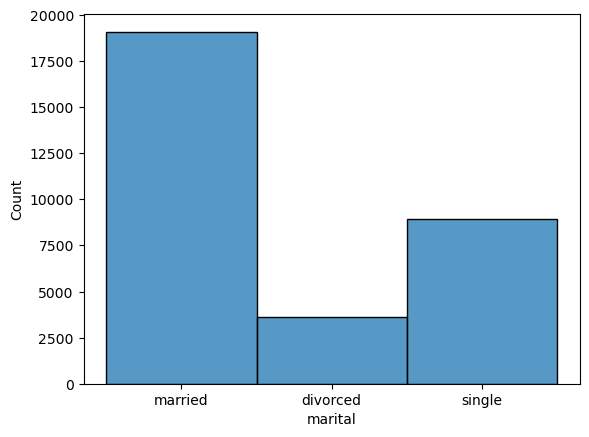

In [14]:
sns.histplot(df['marital'])
print(df['marital'].value_counts(normalize=True)*100)

secondary    51.265523
tertiary     29.389832
primary      15.192593
unknown       4.152052
Name: education, dtype: float64


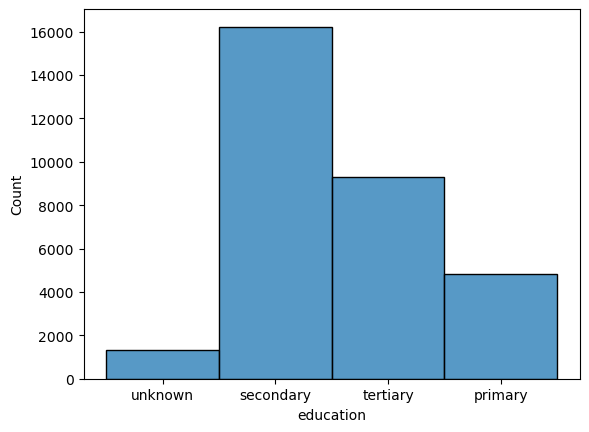

In [15]:
sns.histplot(df['education'])
print(df['education'].value_counts(normalize=True)*100)

no     98.151484
yes     1.848516
Name: default, dtype: float64


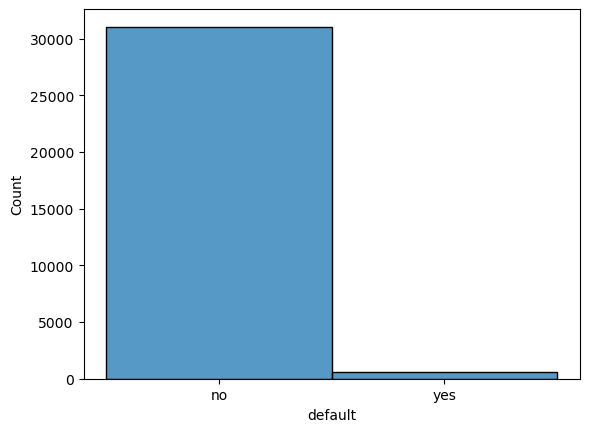

In [16]:
sns.histplot(df['default'])
print(df['default'].value_counts(normalize=True)*100)

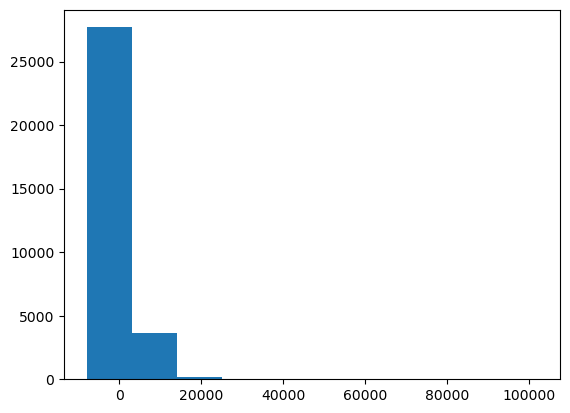

In [17]:
plt.plot(figsize=(7,9))
plt.hist(df['balance'])
plt.show()

yes    55.562929
no     44.437071
Name: housing, dtype: float64


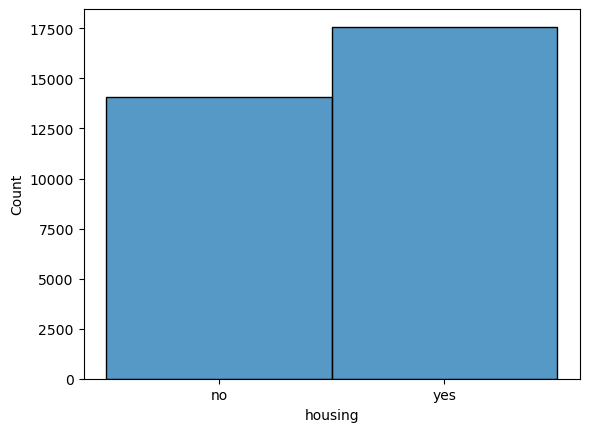

In [18]:
sns.histplot(df['housing'])
print(df['housing'].value_counts(normalize=True)*100)

no     83.786773
yes    16.213227
Name: loan, dtype: float64


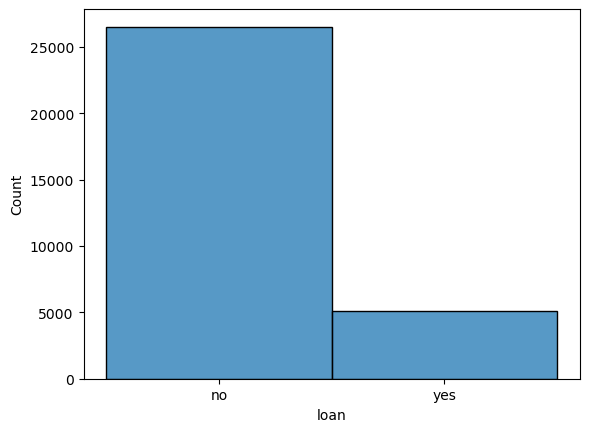

In [19]:
sns.histplot(df['loan'])
print(df['loan'].value_counts(normalize=True)*100)

cellular     64.533763
unknown      28.998009
telephone     6.468228
Name: contact, dtype: float64


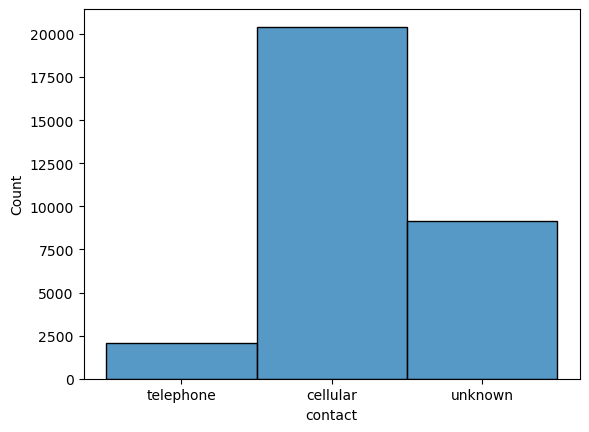

In [20]:
sns.histplot(df['contact'])
print(df['contact'].value_counts(normalize=True)*100)

<AxesSubplot:xlabel='day', ylabel='Count'>

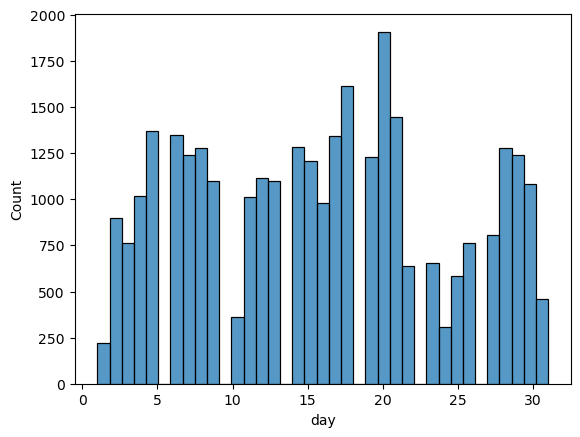

In [21]:
sns.histplot(df['day'])

may    30.552659
jul    15.306348
aug    13.691661
jun    11.811546
nov     8.793883
apr     6.493506
feb     5.773059
jan     3.087180
oct     1.617847
sep     1.295541
mar     1.080671
dec     0.496098
Name: month, dtype: float64


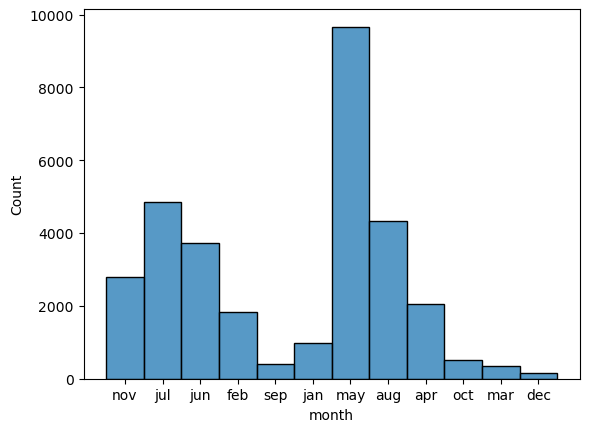

In [22]:
sns.histplot(df['month'])
print(df['month'].value_counts(normalize=True)*100)

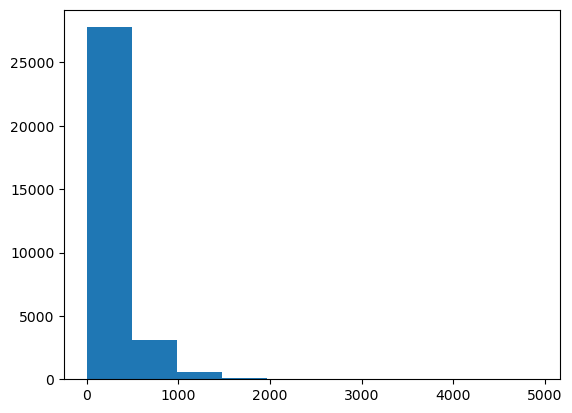

In [23]:
plt.hist(df['duration'])
plt.show()

1     38.746169
2     27.800423
3     12.190729
4      7.716371
5      3.934022
6      2.894429
7      1.636806
8      1.124909
9      0.745726
10     0.581414
11     0.398142
12     0.322305
13     0.293867
14     0.214870
15     0.192751
16     0.170632
17     0.164313
20     0.116915
18     0.116915
19     0.094796
21     0.060037
22     0.056877
25     0.053718
28     0.044238
23     0.041078
24     0.041078
29     0.037918
26     0.028439
31     0.028439
27     0.025279
30     0.018959
32     0.018959
33     0.015799
34     0.015799
43     0.009480
35     0.009480
38     0.009480
37     0.006320
63     0.003160
41     0.003160
50     0.003160
55     0.003160
44     0.003160
36     0.003160
39     0.003160
Name: campaign, dtype: float64


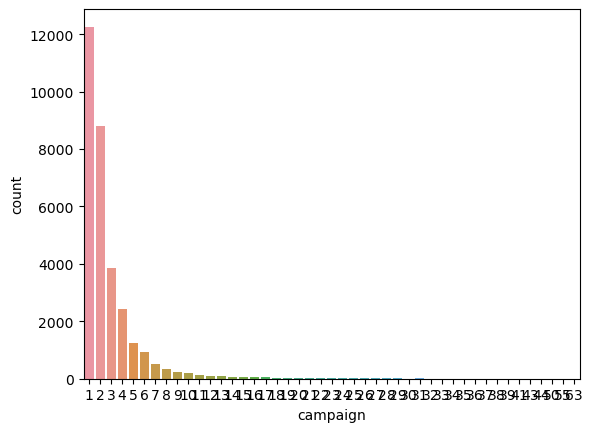

In [24]:
sns.countplot(df['campaign'])
print(df['campaign'].value_counts(normalize=True)*100)

<AxesSubplot:xlabel='pdays', ylabel='Count'>

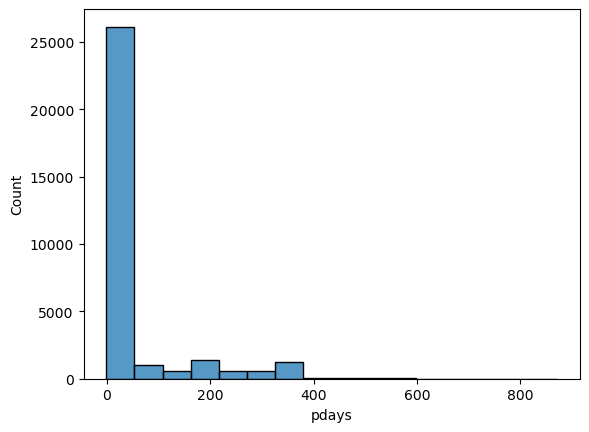

In [25]:
sns.histplot(df['pdays'])

unknown    81.931937
failure    10.623440
other       4.069896
success     3.374727
Name: poutcome, dtype: float64


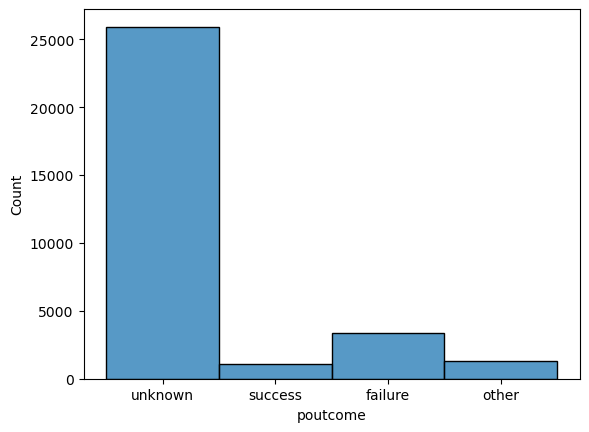

In [26]:
sns.histplot(df['poutcome'])
print(df['poutcome'].value_counts(normalize=True)*100)

no     88.261131
yes    11.738869
Name: subscribed, dtype: float64


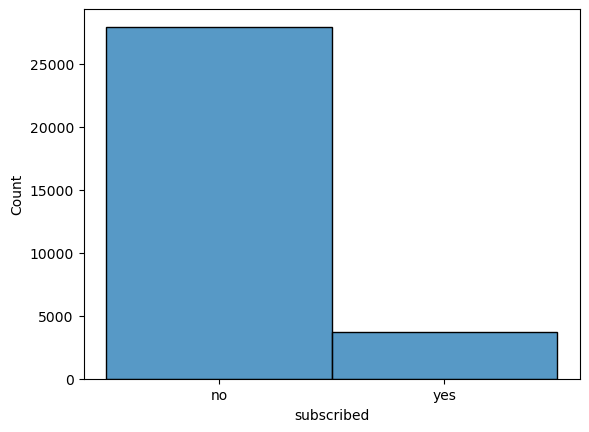

In [27]:
sns.histplot(df['subscribed'])
print(df['subscribed'].value_counts(normalize=True)*100)

In [28]:
# Initialize MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Normalize numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df)

            age         job   marital  education default   balance housing  \
0      0.493506      admin.   married    unknown      no  0.090353      no   
1      0.168831     unknown   married  secondary      no  0.072831      no   
2      0.116883    services   married  secondary      no  0.080893     yes   
3      0.506494  management  divorced   tertiary      no  0.102646      no   
4      0.168831  technician   married  secondary      no  0.073884     yes   
...         ...         ...       ...        ...     ...       ...     ...   
31642  0.142857  management    single   tertiary      no  0.072803     yes   
31643  0.454545  management  divorced   tertiary      no  0.076253      no   
31644  0.181818  management    single   tertiary      no  0.075636      no   
31645  0.506494  technician   married  secondary      no  0.074846     yes   
31646  0.480519  management  divorced  secondary      no  0.074655     yes   

      loan    contact       day month  duration  campaign     p

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in df.drop(['subscribed'],axis=1):
    df[i]=label_encoder.fit_transform(df[i])
df

age  job  marital  education  default  balance  housing  loan  contact  \
0       38    0        1          3        0     2719        0     0        1   
1       13   11        1          1        0      822        0     0        0   
2        9    7        1          1        0     1709        1     0        0   
3       39    4        0          2        0     3815        0     0        0   
4       13    9        1          1        0      938        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   11    4        2          2        0      819        1     0        0   
31643   35    4        0          2        0     1199        0     1        0   
31644   14    4        2          2        0     1131        0     0        0   
31645   39    9        1          1        0     1044        1     0        1   
31646   37    4        0          1        0     1023        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome subscribed  
0       18      9        43         1      0         0         3         no  
1       19      5        90         1      0         0         3         no  
2       17      5       239         0      0         0         3         no  
3       21      6       864         0     79         3         2        yes  
4        3      3       379         0      0         0         3         no  
...    ...    ...       ...       ...    ...       ...       ...        ...  
31642   11      8       115         1      0         0         3         no  
31643    4      6       437         1      0         0         3        yes  
31644    6      1        36         2      0         0         3         no  
31645   14      8        21         6    332        12         0         no  
31646   10      5      1410         1      0         0         3        yes  

[31647 rows x 17 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  int32 
 2   marital     31647 non-null  int32 
 3   education   31647 non-null  int32 
 4   default     31647 non-null  int32 
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  int32 
 7   loan        31647 non-null  int32 
 8   contact     31647 non-null  int32 
 9   day         31647 non-null  int64 
 10  month       31647 non-null  int32 
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  int32 
 16  subscribed  31647 non-null  object
dtypes: int32(9), int64(7), object(1)
memory usage: 3.0+ MB


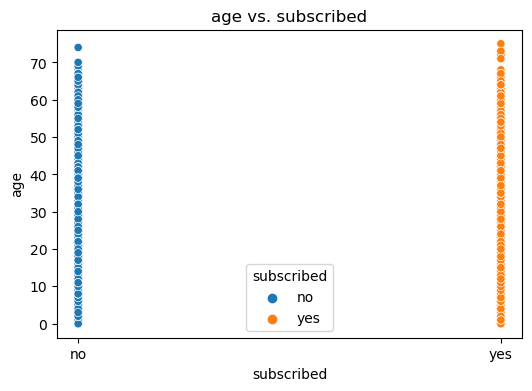

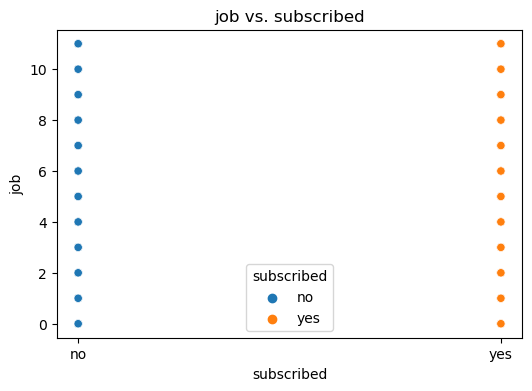

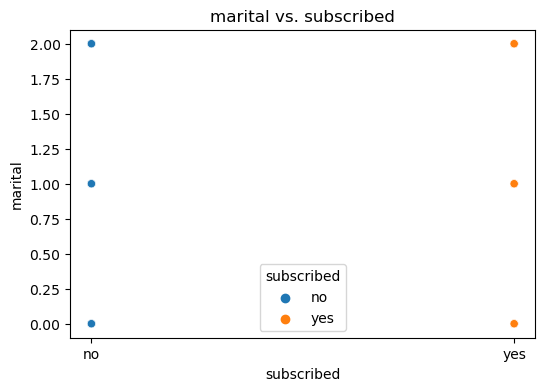

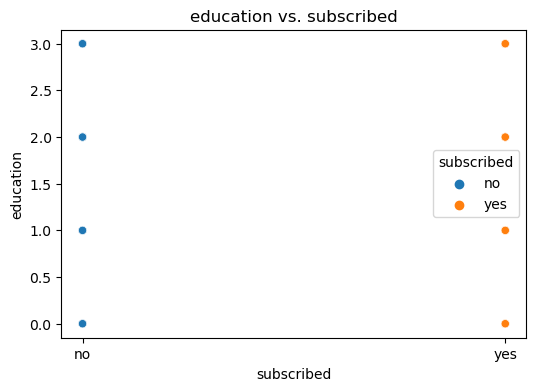

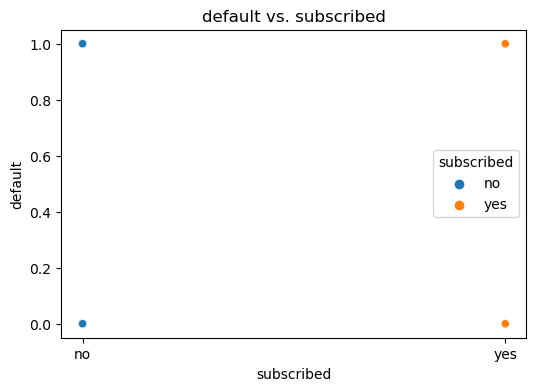

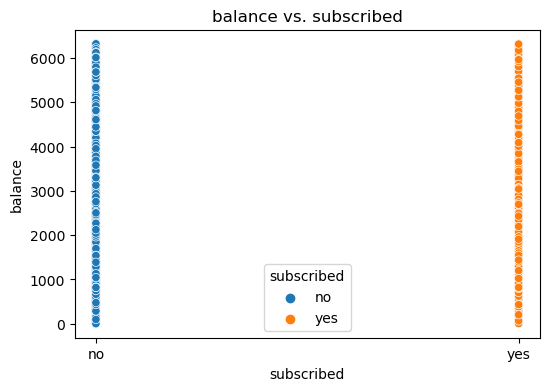

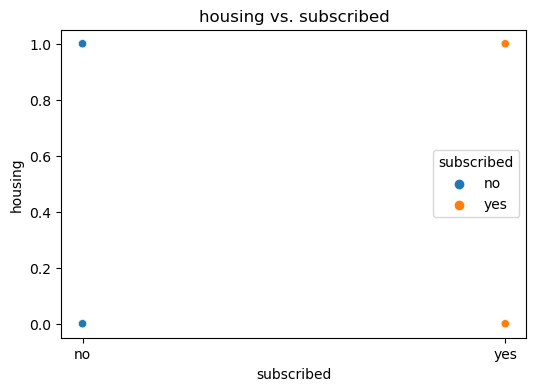

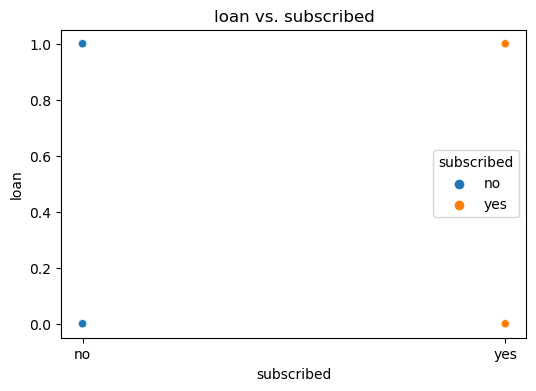

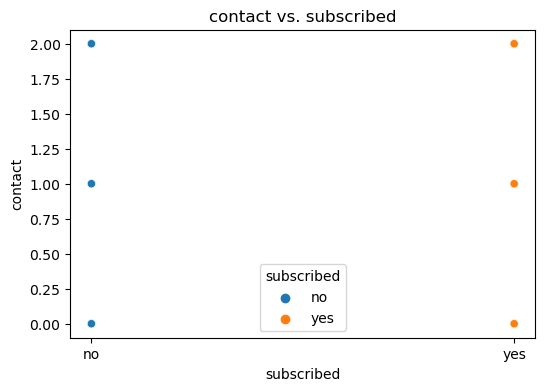

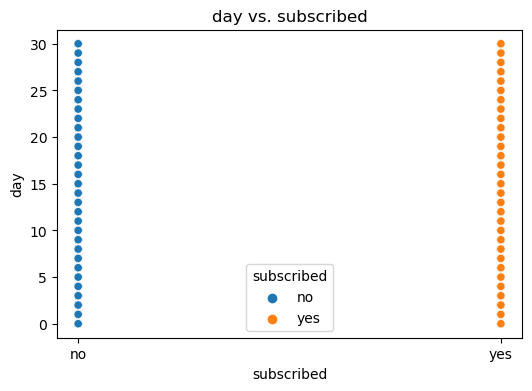

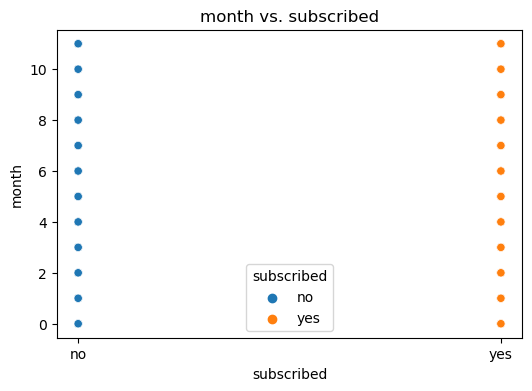

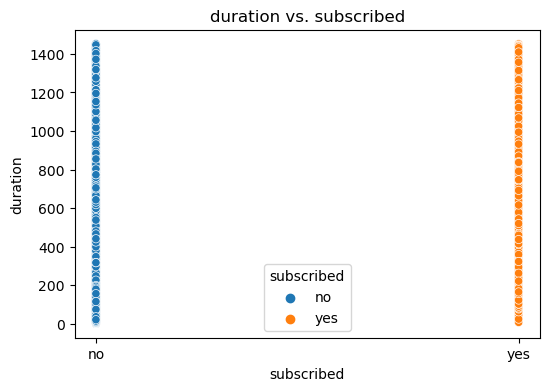

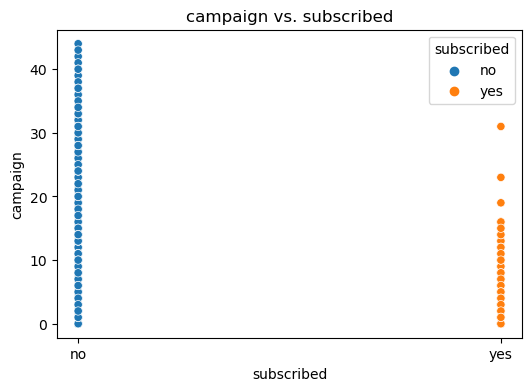

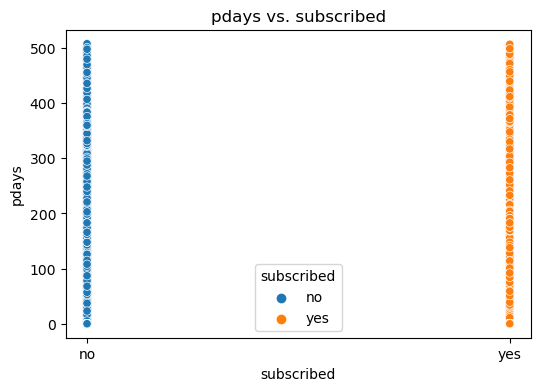

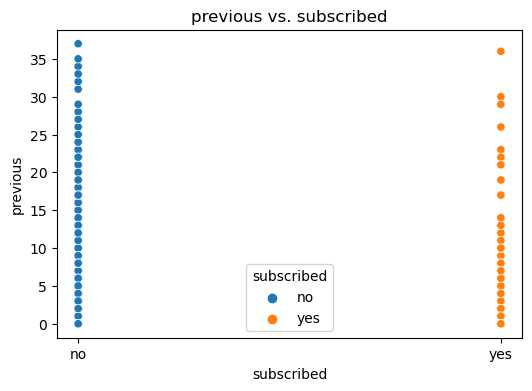

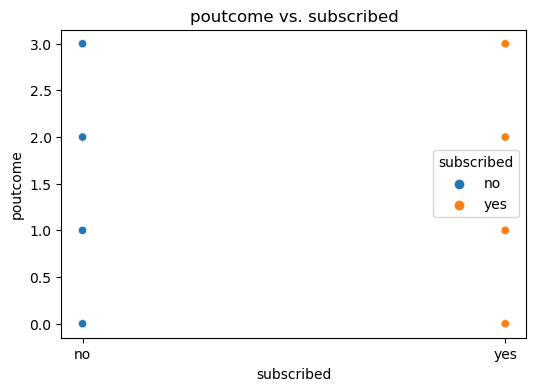

In [31]:
# plot graph for co-relation in Bi Variate Analysis
import seaborn as sns
for col in df.drop(['subscribed'],axis=1):
    plt.figure(figsize=(6,4))
    plt.title(f'{col} vs. subscribed')
    sns.scatterplot(y=df[col],x=df['subscribed'],hue=df['subscribed'])
    plt.show()

<Figure size 600x400 with 0 Axes>

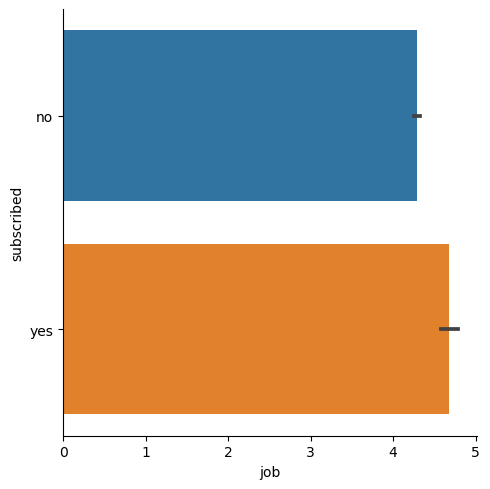

In [32]:
plt.figure(figsize=(6,4))
sns.catplot(x='job',y='subscribed',data=df,kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

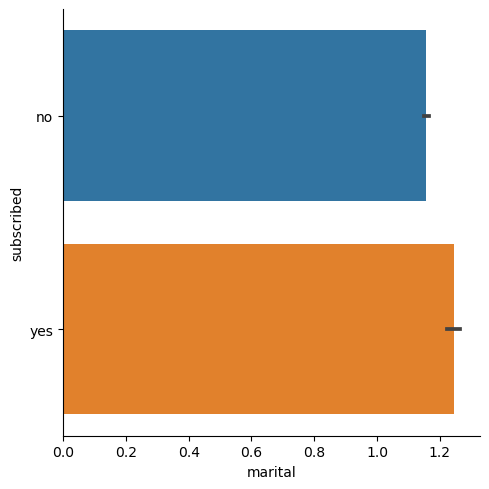

In [33]:
plt.figure(figsize=(6,4))
sns.catplot(x='marital',y='subscribed',data=df,kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

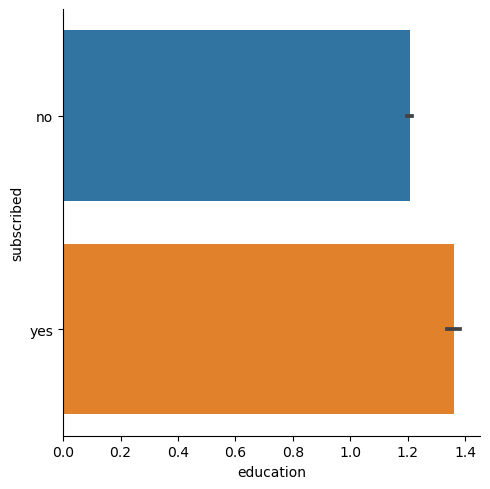

In [34]:
plt.figure(figsize=(6,4))
sns.catplot(x='education',y='subscribed',data=df,kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

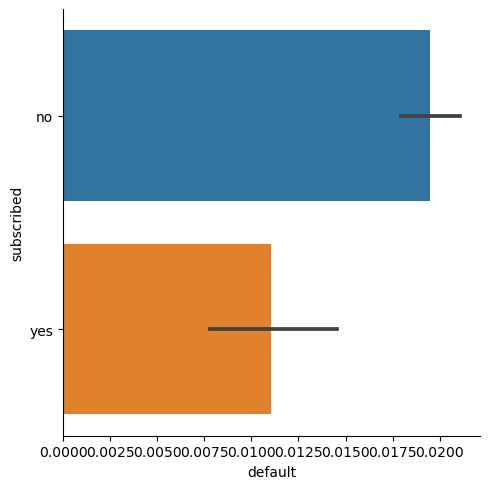

In [35]:
plt.figure(figsize=(6,4))
sns.catplot(x='default',y='subscribed',data=df,kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

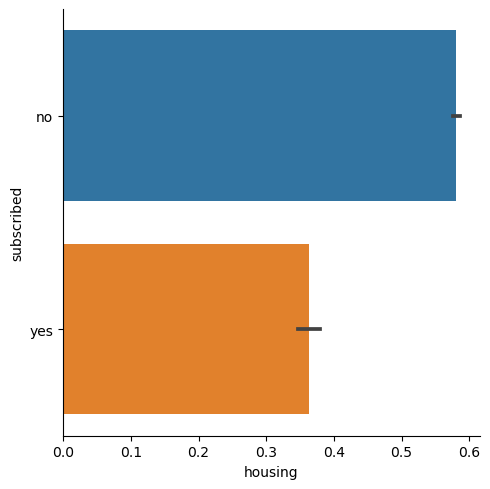

In [36]:
plt.figure(figsize=(6,4))
sns.catplot(x='housing',y='subscribed',data=df,kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

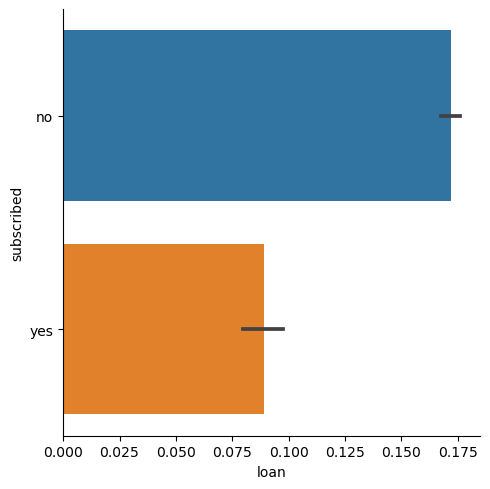

In [37]:
plt.figure(figsize=(6,4))
sns.catplot(x='loan',y='subscribed',data=df,kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

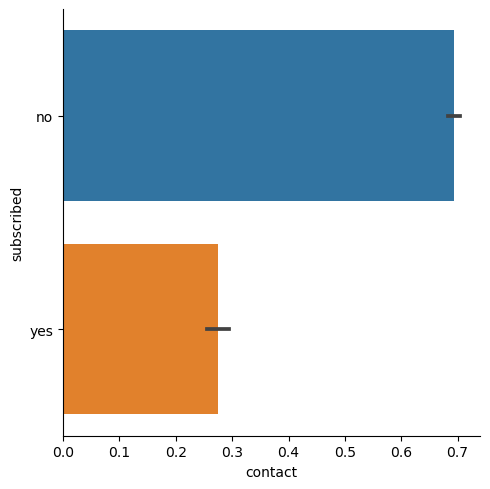

In [38]:
plt.figure(figsize=(6,4))
sns.catplot(x='contact',y='subscribed',data=df,kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

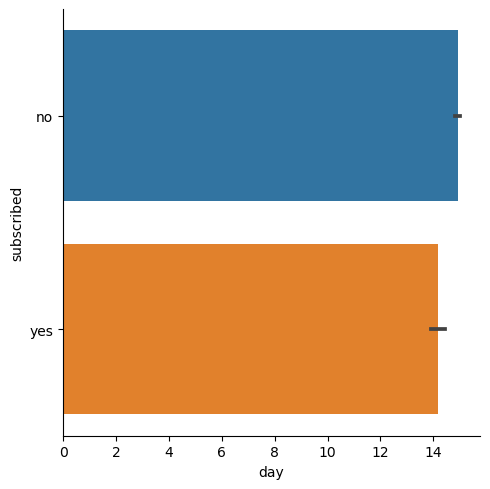

In [39]:
plt.figure(figsize=(6,4))
sns.catplot(x='day',y='subscribed',data=df,kind='bar')
plt.show()

<Figure size 600x400 with 0 Axes>

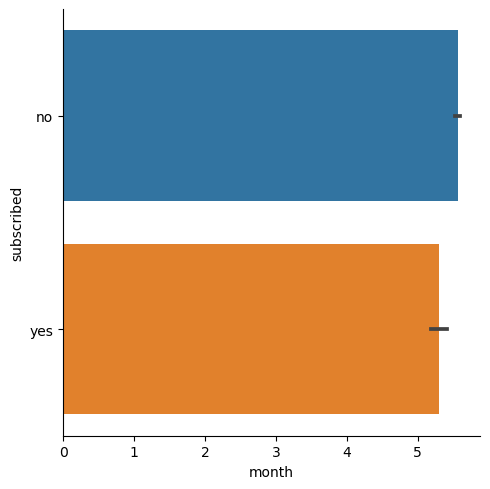

In [40]:
plt.figure(figsize=(6,4))
sns.catplot(x='month',y='subscribed',data=df,kind='bar')
plt.show()

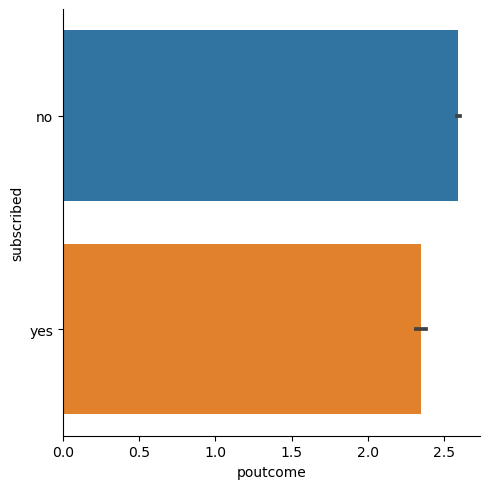

In [41]:
sns.catplot(x='poutcome',y='subscribed',data=df,kind='bar')

In [42]:
# Calculate correlation matrix
correlation_matrix = df.corr()

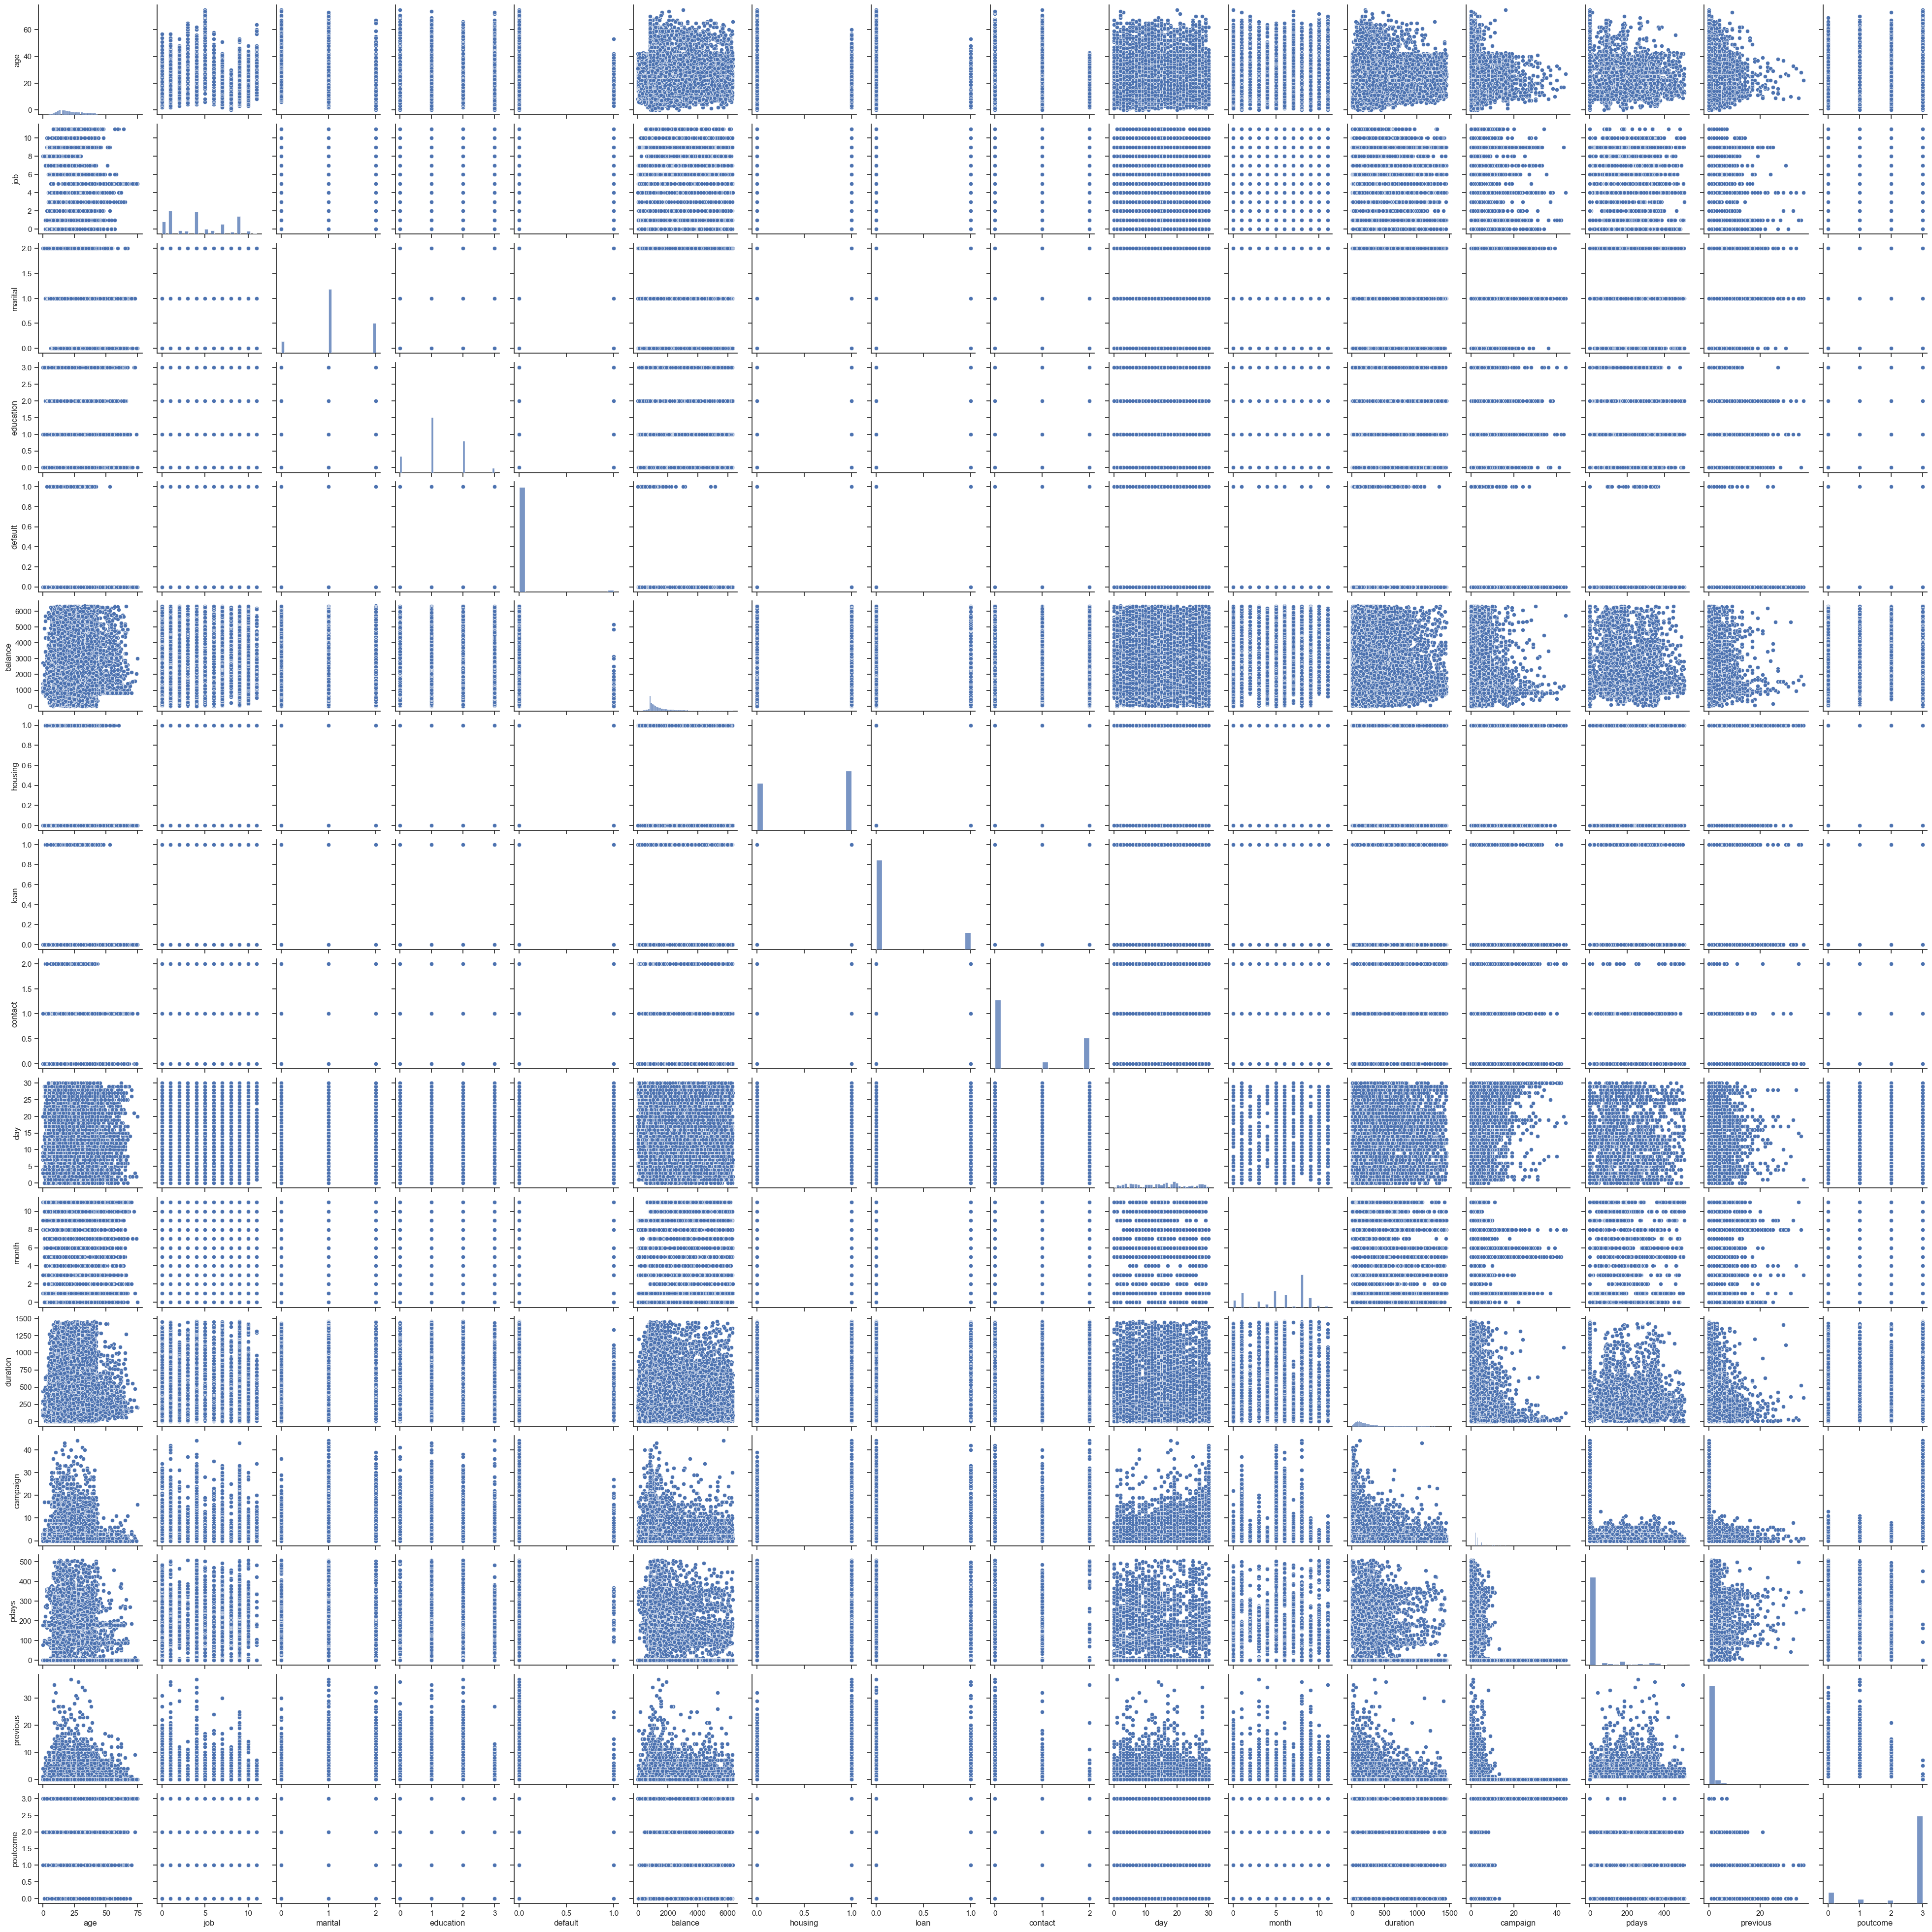

In [43]:
# Plot scatter plots and correlation heatmap for all pairs of numerical columns
sns.set(style="ticks")
sns.pairplot(df, kind="scatter")
plt.show()

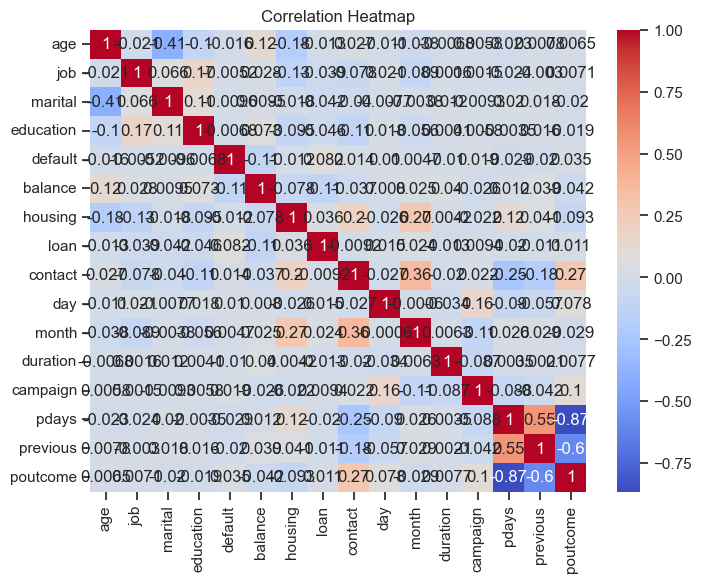

In [44]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
df.describe()

age           job       marital     education       default  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean      22.956520      4.332923      1.167220      1.225013      0.018485   
std       10.621873      3.271868      0.607186      0.749195      0.134700   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.000000      1.000000      1.000000      1.000000      0.000000   
50%       21.000000      4.000000      1.000000      1.000000      0.000000   
75%       30.000000      7.000000      2.000000      2.000000      0.000000   
max       75.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean    1822.242266      0.555629      0.162132      0.644642     14.835466   
std     1352.093883      0.496904      0.368578      0.899480      8.337097   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      892.000000      0.000000      0.000000      0.000000      7.000000   
50%     1269.000000      1.000000      0.000000      0.000000     15.000000   
75%     2245.000000      1.000000      0.000000      2.000000     20.000000   
max     6325.000000      1.000000      1.000000      2.000000     30.000000   

              month      duration      campaign         pdays      previous  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean       5.533131    253.451796      1.764275     39.065946      0.565488   
std        3.004247    235.206200      3.092486     94.878761      1.850987   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000    103.000000      0.000000      0.000000      0.000000   
50%        6.000000    179.000000      1.000000      0.000000      0.000000   
75%        8.000000    317.500000      2.000000      0.000000      0.000000   
max       11.000000   1453.000000     44.000000    508.000000     37.000000   

           poutcome  
count  31647.000000  
mean       2.566152  
std        0.982069  
min        0.000000  
25%        3.000000  
50%        3.000000  
75%        3.000000  
max        3.000000

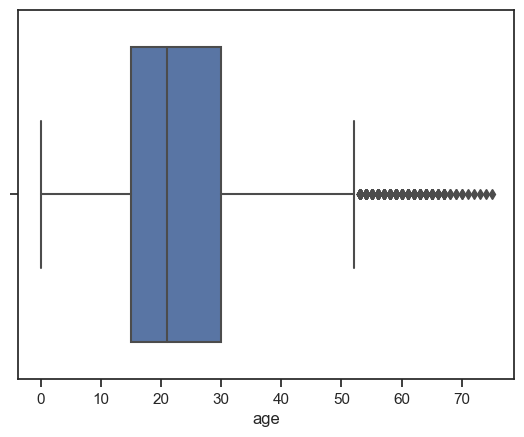

In [46]:
plt.plot(figsize=(6,4))
sns.boxplot(df['age'])
plt.show()

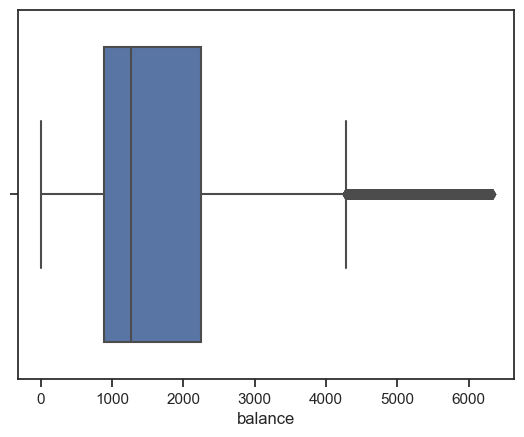

In [47]:
plt.plot(figsize=(6,4))
sns.boxplot(df['balance'])
plt.show()

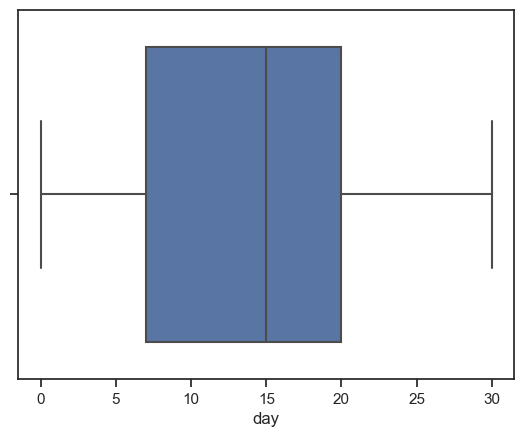

In [48]:
plt.plot(figsize=(6,4))
sns.boxplot(df['day'])
plt.show()

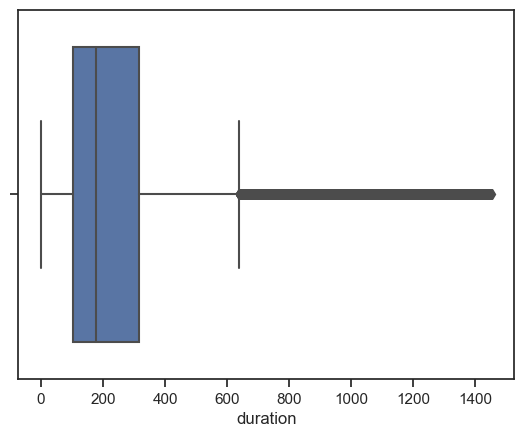

In [49]:
plt.plot(figsize=(6,4))
sns.boxplot(df['duration'])
plt.show()

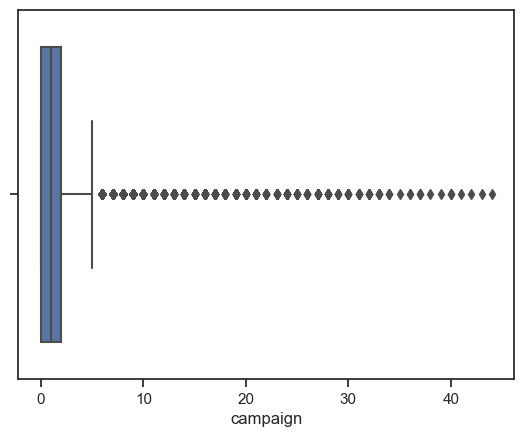

In [50]:
plt.plot(figsize=(6,4))
sns.boxplot(df['campaign'])
plt.show()

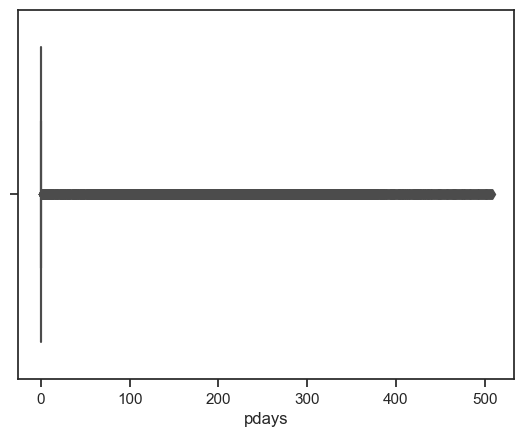

In [51]:
plt.plot(figsize=(6,4))
sns.boxplot(df['pdays'])
plt.show()

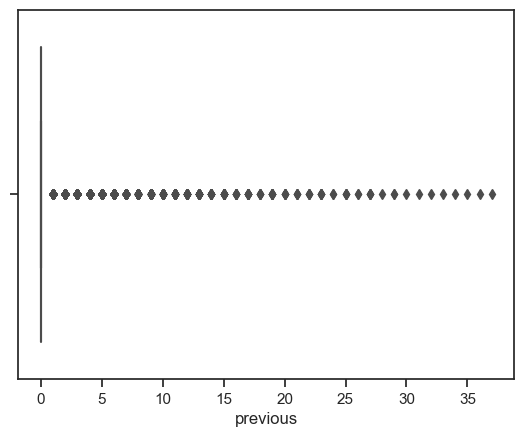

In [52]:
plt.plot(figsize=(6,4))
sns.boxplot(df['previous'])
plt.show()

we can observe that there are manyb outliers and skewness in previous pdays and balanace columns so removing these columns from dataset to get higher accuracy.

In [53]:
df.skew()

age          0.678287
job          0.264817
marital     -0.100071
education    0.199441
default      7.149903
balance      1.540853
housing     -0.223918
loan         1.833474
contact      0.758602
day          0.087185
month       -0.486498
duration     2.120862
campaign     4.658975
pdays        2.456607
previous     6.739237
poutcome    -1.996421
dtype: float64

In [54]:
#remove high skew columns
df.drop(['previous','pdays','balance'],axis=1,inplace=True)

In [55]:
x=df.drop(['subscribed'],axis=1)
y=df['subscribed']

In [56]:
y.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3

x=x[(z<3).all(axis=1)]
print(x.shape)

y=y[(z<3).all(axis=1)]
print(y.shape)

(29428, 13)
(29428,)


In [58]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [61]:
vif_calc()

    VIF Factor   features
0     4.318318        age
1     2.956849        job
2     4.046883    marital
3     3.764080  education
4          NaN    default
5     1.864573    housing
6     1.140651       loan
7     1.673859    contact
8     3.807600        day
9     4.213022      month
10    2.713644   duration
11    1.520528   campaign
12    5.978416   poutcome


In [62]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.4464874 , -1.39977565, -0.18693503, ..., -1.19046827,
        -0.0516025 ,  0.65954254],
       [-0.86394917,  2.16571233, -0.18693503, ..., -0.98285645,
        -0.0516025 ,  0.65954254],
       [-1.23361902,  0.86917124, -0.18693503, ..., -0.32468279,
        -0.65608569,  0.65954254],
       ...,
       [ 0.98440008,  1.19330652, -0.18693503, ...,  1.53940634,
        -0.65608569, -0.31130791],
       [ 1.26165247,  0.86917124, -0.18693503, ...,  2.21524909,
        -0.65608569, -1.28215836],
       [ 2.27824456,  0.2209007 , -0.18693503, ...,  1.4819818 ,
        -0.65608569, -0.31130791]])

In [63]:
y.value_counts()

no     26357
yes    26357
Name: subscribed, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=348,test_size=0.25)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
rfc=RandomForestClassifier()
etc = ExtraTreesClassifier()
lr=LogisticRegression()

In [67]:
#GradientBoostingClassifier
gbc.fit(X_train,Y_train)
pred_gbc=gbc.predict(X_test)
print('Accuracy of model =',accuracy_score(Y_test,pred_gbc)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(Y_test,pred_gbc))
print('\n')
print('Classification Report','\n',classification_report(Y_test,pred_gbc))

Accuracy of model = 90.01441687533197


Confusion matrix 
 [[5785  808]
 [ 508 6078]]


Classification Report 
               precision    recall  f1-score   support

          no       0.92      0.88      0.90      6593
         yes       0.88      0.92      0.90      6586

    accuracy                           0.90     13179
   macro avg       0.90      0.90      0.90     13179
weighted avg       0.90      0.90      0.90     13179



In [68]:
 # Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(gbc, x, y, cv=5).mean())*100    
print("Cross Validation Score:", cv_score)

Cross Validation Score: 89.35579947748289


In [69]:
#AdaBoostClassifier
abc.fit(X_train,Y_train)
pred_abc=abc.predict(X_test)
print('Accuracy of model =',accuracy_score(Y_test,pred_abc)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(Y_test,pred_abc))
print('\n')
print('Classification Report','\n',classification_report(Y_test,pred_abc))

Accuracy of model = 88.5272023674027


Confusion matrix 
 [[5765  828]
 [ 684 5902]]


Classification Report 
               precision    recall  f1-score   support

          no       0.89      0.87      0.88      6593
         yes       0.88      0.90      0.89      6586

    accuracy                           0.89     13179
   macro avg       0.89      0.89      0.89     13179
weighted avg       0.89      0.89      0.89     13179



In [70]:
 # Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(abc, x, y, cv=5).mean())*100    
print("Cross Validation Score:", cv_score)

Cross Validation Score: 88.19671535849979


In [71]:
#randomforestClassifier
rfc.fit(X_train,Y_train)
pred_rfc=rfc.predict(X_test)
print('Accuracy of model =',accuracy_score(Y_test,pred_rfc)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(Y_test,pred_rfc))
print('\n')
print('Classification Report','\n',classification_report(Y_test,pred_rfc))

Accuracy of model = 93.92973670232946


Confusion matrix 
 [[6066  527]
 [ 273 6313]]


Classification Report 
               precision    recall  f1-score   support

          no       0.96      0.92      0.94      6593
         yes       0.92      0.96      0.94      6586

    accuracy                           0.94     13179
   macro avg       0.94      0.94      0.94     13179
weighted avg       0.94      0.94      0.94     13179



In [72]:
 # Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(rfc, x, y, cv=5).mean())*100    
print("Cross Validation Score:", cv_score)

Cross Validation Score: 93.60893899503948


In [73]:
#extratreesClassifier
etc.fit(X_train,Y_train)
pred_etc=etc.predict(X_test)
print('Accuracy of model =',accuracy_score(Y_test,pred_etc)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(Y_test,pred_etc))
print('\n')
print('Classification Report','\n',classification_report(Y_test,pred_etc))

Accuracy of model = 93.9069732149632


Confusion matrix 
 [[6079  514]
 [ 289 6297]]


Classification Report 
               precision    recall  f1-score   support

          no       0.95      0.92      0.94      6593
         yes       0.92      0.96      0.94      6586

    accuracy                           0.94     13179
   macro avg       0.94      0.94      0.94     13179
weighted avg       0.94      0.94      0.94     13179



In [74]:
 # Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(etc, x, y, cv=5).mean())*100    
print("Cross Validation Score:", cv_score)

Cross Validation Score: 93.59945726774343


In [75]:
#Logistic Regression
lr.fit(X_train,Y_train)
pred_lr=lr.predict(X_test)
print('Accuracy of model =',accuracy_score(Y_test,pred_lr)*100,'%',)
print('\n')
print('Confusion matrix','\n',confusion_matrix(Y_test,pred_lr))
print('\n')
print('Classification Report','\n',classification_report(Y_test,pred_lr))

Accuracy of model = 85.49207071856742 %


Confusion matrix 
 [[5447 1146]
 [ 766 5820]]


Classification Report 
               precision    recall  f1-score   support

          no       0.88      0.83      0.85      6593
         yes       0.84      0.88      0.86      6586

    accuracy                           0.85     13179
   macro avg       0.86      0.85      0.85     13179
weighted avg       0.86      0.85      0.85     13179



In [76]:
 # Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100    
print("Cross Validation Score:", cv_score)

Cross Validation Score: 85.21078929585471


In [77]:
grid_paramrfc={
    
'n_estimators':[100,200,300],
     'criterion' : ['entropy','gini'],
     'max_depth' :[None,1,2,3],
     'min_samples_split' : [2,3,4,5],
    'max_features' :['sqrt','log2',None],
     'bootstrap' :[True,False],
     'random_state':[None,10,20,30]
 }

In [78]:
#use of gridsearch cv
from sklearn.model_selection import GridSearchCV

In [79]:
gd_rfc=GridSearchCV(estimator=rfc,n_jobs=-1,
                   param_grid=grid_paramrfc,
                   scoring='accuracy',
                   cv=8)

In [ ]:
#best_params = gd_rfc.best_params_

In [88]:
best_model =RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None,min_samples_split=3,max_features='log2')

In [91]:
# RandomForestClassifier
best_model.fit(X_train,Y_train)
pred_rfch=best_model.predict(X_test)
print('Accuracy of model =',accuracy_score(Y_test,pred_rfch)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(Y_test,pred_rfch))
print('\n')
print('Classification Report','\n',classification_report(Y_test,pred_rfch))

Accuracy of model = 93.93732453145155


Confusion matrix 
 [[6062  531]
 [ 268 6318]]


Classification Report 
               precision    recall  f1-score   support

          no       0.96      0.92      0.94      6593
         yes       0.92      0.96      0.94      6586

    accuracy                           0.94     13179
   macro avg       0.94      0.94      0.94     13179
weighted avg       0.94      0.94      0.94     13179



In [96]:
#saving the model
filename = "bank_marketing.pkl"
joblib.dump(best_model, filename)

['bank_marketing.pkl']

In [98]:
#testing
test_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_df.head(5)

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

In [100]:
test_df.drop(['ID','previous','pdays','balance','duration'],axis=1,inplace=True)
test_df.head(2)

age       job   marital  education default housing loan    contact  day  \
0   32  services   married  secondary      no     yes   no   cellular   15   
1   78   retired  divorced    primary      no      no   no  telephone    1   

  month  campaign poutcome  
0   may         6  unknown  
1   jul         1  unknown

as evaluated in the training dataset the columns were removed in testing dataset as well.

In [101]:
#encoding
le=LabelEncoder()
test_df['job']=le.fit_transform(test_df['job'])
test_df['marital']=le.fit_transform(test_df['marital'])
test_df['education']=le.fit_transform(test_df['education'])
test_df['default']=le.fit_transform(test_df['default'])
test_df['housing']=le.fit_transform(test_df['housing'])
test_df['loan']=le.fit_transform(test_df['loan'])
test_df['contact']=le.fit_transform(test_df['contact'])
test_df['month']=le.fit_transform(test_df['month'])
test_df['poutcome']=le.fit_transform(test_df['poutcome'])

In [102]:
test_df

age  job  marital  education  default  housing  loan  contact  day  \
0       32    7        1          1        0        1     0        0   15   
1       78    5        0          0        0        0     0        1    1   
2       31    6        2          2        0        1     0        2   16   
3       57    7        2          0        0        1     0        1   13   
4       45    1        0          1        0        0     1        2    3   
...    ...  ...      ...        ...      ...      ...   ...      ...  ...   
13559   39    4        1          2        0        0     0        0   28   
13560   54    1        1          0        0        1     0        2   20   
13561   35    5        1          0        0        1     0        0   29   
13562   29    0        2          1        0        0     0        0    9   
13563   29    0        1          1        0        1     0        0    6   

       month  campaign  poutcome  
0          8         6         3  
1          5         1         3  
2          8         1         3  
3          8         2         3  
4          5         1         3  
...      ...       ...       ...  
13559      1         4         3  
13560      6         1         3  
13561      4         1         3  
13562      9         2         2  
13563      8         1         0  

[13564 rows x 12 columns]

In [104]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(test_df))
threshold=3

X_test=test_df[(z<3).all(axis=1)]
print(X_test.shape)

(12940, 12)


In [106]:
#for scaling we use standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtes=sc.fit_transform(X_test)
Xtes

array([[-0.8527007 ,  0.80620379, -0.28174092, ...,  0.8214164 ,
         1.89032711,  0.45857576],
       [-0.95162171,  0.50198481,  1.35826247, ...,  0.8214164 ,
        -0.7595302 ,  0.45857576],
       [ 1.62032473,  0.80620379,  1.35826247, ...,  0.8214164 ,
        -0.22955874,  0.45857576],
       ...,
       [-0.55593764,  0.19776584, -0.28174092, ..., -0.50415923,
        -0.7595302 ,  0.45857576],
       [-1.14946375, -1.32332902,  1.35826247, ...,  1.1528103 ,
        -0.22955874, -0.52647907],
       [-1.14946375, -1.32332902, -0.28174092, ...,  0.8214164 ,
        -0.7595302 , -2.49658873]])

In [107]:
import joblib
load_bank=joblib.load("bank_marketing.pkl")

In [108]:
load_bank

RandomForestClassifier(max_features='log2', min_samples_split=3,
                       n_estimators=200)